In [1]:
import numpy as np

%load_ext autoreload
%autoreload 2
from darksight.darksight import *

%matplotlib inline

In [2]:
# Load logit into NumPy
logit_f = open("./examples/data/lenet-mnist.csv", "r")
logit_np = np.loadtxt(logit_f)

# Generate knowledge by logit_np
klg = Knowledge(logit_np, T=1)

[Knowledge.__init__] <class 'torch.Tensor'> with size of torch.Size([10000, 10]) is loaded


In [120]:
# Give DarkSight the knowledge to distill
ds = DarkSight(klg)

In [121]:
use_cuda = True if torch.cuda.is_available() else False

# PyTorch DarkSight; with use_gpu=True and gpu_id=0, by default
ds.ready(use_cuda=use_cuda)

In [122]:
# Train for 2000 epochs with lr_cond, lr_y, lr_prior=1e-2, 5e-3, 1e-6
ds.train(2000, [2e-2, 1e-2, 1e-6], do_annealing=True)

-------+--------+---
 Epoch |  Loss  | T 
-------+--------+---
   100 | 0.1244 | 9
   200 | 0.1355 | 8
   300 | 0.1457 | 7
   400 | 0.1401 | 6
   500 | 0.1395 | 5
   600 | 0.1326 | 4
   700 | 0.1158 | 3
   800 | 0.0954 | 2
   900 | 0.0601 | 1
  1000 | 0.0521 | 1
  1100 | 0.0449 | 1
  1200 | 0.0412 | 1
  1300 | 0.0383 | 1
  1400 | 0.0358 | 1
  1500 | 0.0343 | 1
  1600 | 0.0325 | 1
  1700 | 0.0278 | 1
  1800 | 0.0264 | 1
  1900 | 0.0231 | 1
  2000 | 0.0220 | 1
Time used: 38.778919
Final loss: 0.022036
Accuracy to teacher: 100.0000


/Users/kai/miniconda2/envs/ml/lib/python2.7/site-packages/matplotlib/legend.py:938: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x1170ff090>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)


(<Figure size 576x324 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x116eeeed0>)

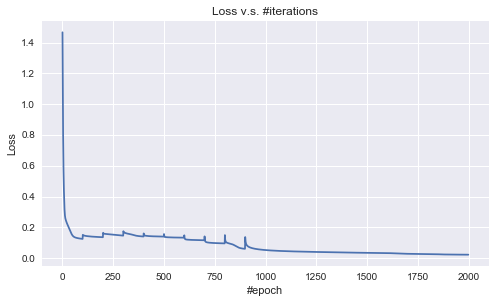

In [123]:
# Plot loss (i.e. symmetric KL divergence)
ds.plot_loss()

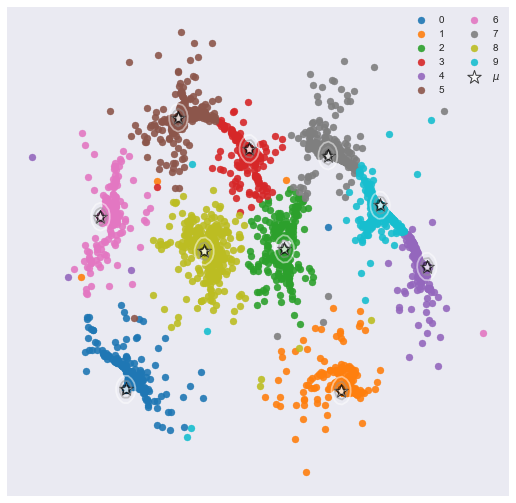

In [124]:
# Plot 2D plot; with use_gpu=True and gpu_id=0 to generate contour, by default
fig, ax = ds.plot_y(contour_on=True, use_cuda=use_cuda)
fig.savefig("./examples/results/lenet-mnist.png", format="png", dpi=800, bbox_inches = 'tight', pad_inches = 0)

In [8]:
# Output trained DarkSight to .csv file
ds.output("./examples/results/lenet-mnist.csv")

## End of the demo